In [1]:
# end goal is to do the risk analysis and also try to show important kpis to our managers

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import ScalarFormatter  # Import ScalarFormatter
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors

In [3]:
import mysql.connector

# Connect to server
cnx = mysql.connector.connect(
    host="localhost",
    port=3306,
    user="root",
    password="########")

In [4]:
bankingCustomerQuery = "select * from BankingSystem.banking_customer"
genderquery = "select * from BankingSystem.gender"
bankingRelationshipQuery ="select * from BankingSystem.banking_realtionships"
investmentAdvisiorsQuery = "select * from BankingSystem.investment_advisiors"

In [5]:
dfbankingCustomer = pd.read_sql(bankingCustomerQuery, cnx)
dfGender = pd.read_sql(genderquery, cnx)
dfbankingRelationship = pd.read_sql(bankingRelationshipQuery, cnx)
dfinvestmentAdvisiors = pd.read_sql(investmentAdvisiorsQuery, cnx)

C:\Users\Acer\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 

In [49]:
df = dfbankingCustomer.merge(dfGender, left_on='GenderId', right_on='ï»¿GenderId', how='outer').merge(dfbankingRelationship, left_on='BRId', right_on='ï»¿BRId', how='outer').merge(dfinvestmentAdvisiors, left_on ='IAId', right_on='ï»¿IAId', how='outer')


In [7]:
cnx.close()

In [8]:
df.head(10)

,ï»¿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Risk Weighting,BRId,GenderId,IAId,ï»¿GenderId,Gender,ï»¿BRId,Banking Relationship,ï»¿IAId,Investment Advisor
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,2,1,1,1,1,Male,1,Retail,1,Victor Dean
1,IND52609,Angela Roberts,22,30762,09-07-2005,Nicholas Cunningham,European,Health Coach I,High,Jade,...,1,1,1,1,1,Male,1,Retail,1,Victor Dean
2,IND61397,Carol Duncan,74,26887,28-04-2021,Nicholas Simmons,European,Developer I,High,Gold,...,1,1,1,1,1,Male,1,Retail,1,Victor Dean
3,IND19395,Jeremy Fowler,52,3028,14-07-2002,Roger Alexander,Asian,Administrative Assistant II,Low,Jade,...,1,1,1,1,1,Male,1,Retail,1,Victor Dean
4,IND66158,Tammy Kennedy,78,24930,06-11-2014,Joshua Little,European,Health Coach II,Mid,Jade,...,2,1,1,1,1,Male,1,Retail,1,Victor Dean
5,IND70183,Jesse Lane,82,42747,18-03-2005,Stephen Payne,European,Operator,Mid,Jade,...,2,1,1,1,1,Male,1,Retail,1,Victor Dean
6,IND91317,Marilyn Campbell,51,5073,27-02-1995,Victor Ramos,Asian,Media Manager III,High,Jade,...,4,1,1,1,1,Male,1,Retail,1,Victor Dean
7,IND24037,Jesse George,18,14818,30-09-1996,Anthony Torres,American,Associate Professor,High,Jade,...,4,1,1,1,1,Male,1,Retail,1,Victor Dean
8,IND84942,Beverly Armstrong,30,4827,22-04-1999,Paul Holmes,American,Structural Analysis Engineer,Mid,Jade,...,1,1,1,1,1,Male,1,Retail,1,Victor Dean
9,IND52032,Judy Williamson,46,12780,03-07-2014,Chris Armstrong,Asian,Office Assistant III,Mid,Jade,...,2,1,1,1,1,Male,1,Retail,1,Victor Dean


In [9]:
print(df)

     ï»¿Client ID             Name  Age  Location ID Joined Bank  \
0        IND81288    Raymond Mills   24        34324  06-05-2019   
1        IND52609   Angela Roberts   22        30762  09-07-2005   
2        IND61397     Carol Duncan   74        26887  28-04-2021   
3        IND19395    Jeremy Fowler   52         3028  14-07-2002   
4        IND66158    Tammy Kennedy   78        24930  06-11-2014   
...           ...              ...  ...          ...         ...   
2995     IND78689    Mildred Burns   53        30789  29-09-2012   
2996     IND92115      Russell Cox   40        15173  03-02-2010   
2997     IND99980    Marie Alvarez   47        25059  27-06-2018   
2998     IND77237     James Fuller   28         1375  04-04-2013   
2999     IND90745  Julia Alexander   18        28611  01-12-2013   

          Banking Contact Nationality                   Occupation  \
0          Anthony Torres    American         Safety Technician IV   
1     Nicholas Cunningham    European      

In [10]:
df.tail()

,ï»¿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Risk Weighting,BRId,GenderId,IAId,ï»¿GenderId,Gender,ï»¿BRId,Banking Relationship,ï»¿IAId,Investment Advisor
2995,IND78689,Mildred Burns,53,30789,29-09-2012,James Castillo,European,Structural Engineer,Mid,Platinum,...,4,3,2,19,2,Female,3,Private Bank,19,Nicholas Morrison
2996,IND92115,Russell Cox,40,15173,03-02-2010,Victor Martinez,Asian,Accounting Assistant IV,High,Silver,...,2,3,2,19,2,Female,3,Private Bank,19,Nicholas Morrison
2997,IND99980,Marie Alvarez,47,25059,27-06-2018,Victor Martinez,European,Programmer III,Mid,Platinum,...,1,3,2,19,2,Female,3,Private Bank,19,Nicholas Morrison
2998,IND77237,James Fuller,28,1375,04-04-2013,Anthony Berry,Asian,Computer Systems Analyst IV,Low,Silver,...,5,3,2,19,2,Female,3,Private Bank,19,Nicholas Morrison
2999,IND90745,Julia Alexander,18,28611,01-12-2013,Jason Duncan,African,Accounting Assistant IV,Mid,Silver,...,1,3,2,19,2,Female,3,Private Bank,19,Nicholas Morrison


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ï»¿Client ID              3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [12]:
df = df.drop(columns = ['ï»¿GenderId','ï»¿BRId','ï»¿IAId'])

In [13]:
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [14]:
# convert numerical value to categorical values
columns_to_convert = ['BRId', 'GenderId','IAId','Location ID']
for col in columns_to_convert:
    df[col] = df[col].astype('category')

In [15]:
df.describe()

,Age,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000
mean,51.039667,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333
std,19.854760,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191
min,17.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000
25%,34.000000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000
50%,51.000000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000
75%,69.000000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000
max,85.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000


In [16]:
df['Estimated Income'].min()

15919.48

In [17]:
df['Estimated Income'].max()

522330.26

<AxesSubplot: >

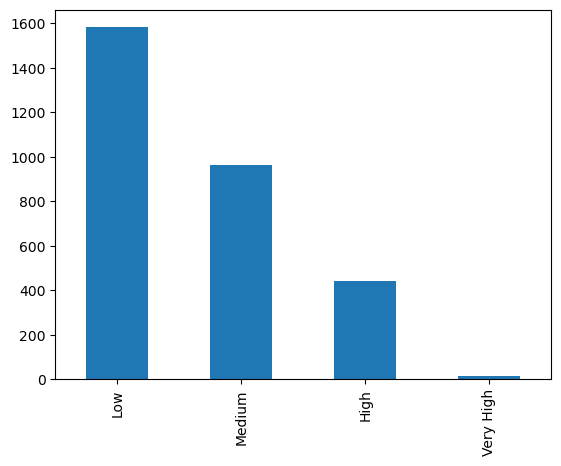

In [18]:
income_bins=[0,150000,300000,500000,float('inf')]
lables =['Low','Medium','High', 'Very High']
df['Income Band'] = pd.cut(df['Estimated Income'], bins= income_bins, labels=lables, right=False)
df['Income Band'].value_counts().plot(kind='bar')

In [19]:
minAge =df['Age'].min()
maxAge = (df['Age'].max() + 1 )

In [20]:
num_of_bins = int(np.ceil(np.log2(df['Age'].max())+1))

num_of_bins

8

In [21]:
age_bins= np.ceil(np.linspace(minAge, maxAge, num_of_bins + 1)).astype(int) # created the dynamic bins for age
print(age_bins)
age_labels = [f"{age_bins[i]}-{age_bins[i+1]}" for i in range(len(age_bins)-1)] # creating dynamic lables for ages
print(age_labels)

[17 26 35 43 52 61 69 78 86]
['17-26', '26-35', '35-43', '43-52', '52-61', '61-69', '69-78', '78-86']


In [22]:
df['age range band']=pd.cut(df['Age'], bins=age_bins, labels= age_labels, right= False)

In [23]:
print(df)

     ï»¿Client ID             Name  Age Location ID Joined Bank  \
0        IND81288    Raymond Mills   24       34324  06-05-2019   
1        IND52609   Angela Roberts   22       30762  09-07-2005   
2        IND61397     Carol Duncan   74       26887  28-04-2021   
3        IND19395    Jeremy Fowler   52        3028  14-07-2002   
4        IND66158    Tammy Kennedy   78       24930  06-11-2014   
...           ...              ...  ...         ...         ...   
2995     IND78689    Mildred Burns   53       30789  29-09-2012   
2996     IND92115      Russell Cox   40       15173  03-02-2010   
2997     IND99980    Marie Alvarez   47       25059  27-06-2018   
2998     IND77237     James Fuller   28        1375  04-04-2013   
2999     IND90745  Julia Alexander   18       28611  01-12-2013   

          Banking Contact Nationality                   Occupation  \
0          Anthony Torres    American         Safety Technician IV   
1     Nicholas Cunningham    European               Hea

In [24]:
df['age range band'] = pd.Categorical(df['age range band'], categories= age_labels, ordered = True)
sorted_age_counts = df.sort_values(by='age range band')
sorted_age_counts

,ï»¿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Properties Owned,Risk Weighting,BRId,GenderId,IAId,Gender,Banking Relationship,Investment Advisor,Income Band,age range band
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1,2,1,1,1,Male,Retail,Victor Dean,Low,17-26
1205,IND32547,Wayne Hart,17,29676,30-05-2021,Adam Hernandez,Asian,Help Desk Technician,High,Jade,...,1,5,3,2,3,Female,Private Bank,Ernest Knight,Low,17-26
1212,IND72913,Juan Austin,20,23779,03-08-2013,Stephen Payne,Asian,Structural Analysis Engineer,High,Jade,...,3,2,3,2,3,Female,Private Bank,Ernest Knight,Low,17-26
1233,IND20140,Joseph Adams,25,24592,15-08-2013,Douglas Tucker,European,Database Administrator II,Mid,Gold,...,3,2,3,2,3,Female,Private Bank,Ernest Knight,Medium,17-26
1234,IND12706,Frances Gilbert,21,14163,12-04-1996,Joe Hanson,American,VP Product Management,High,Jade,...,1,2,3,2,3,Female,Private Bank,Ernest Knight,Low,17-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327,IND21371,Timothy Larson,85,11552,27-10-2006,Anthony Berry,Australian,Project Manager,Low,Silver,...,0,1,4,1,20,Male,Commercial,Jack Phillips,Low,78-86
774,IND77434,Mary Lawrence,80,42902,10-06-2019,Jeremy Vasquez,Australian,Senior Developer,High,Platinum,...,1,2,3,2,11,Female,Private Bank,Peter Castillo,Low,78-86
2333,IND59595,Charles Porter,81,386,12-10-2020,Stephen Payne,Asian,Social Worker,Mid,Platinum,...,1,1,4,2,20,Female,Commercial,Jack Phillips,Low,78-86
2409,IND80508,Ernest Boyd,84,16826,05-03-2016,Victor Ramos,Asian,Financial Analyst,Low,Gold,...,3,2,2,2,5,Female,Institutional,Kevin Kim,Medium,78-86


In [25]:
age_range_null_check = df[df['age range band'].isnull()]

In [26]:
print(age_range_null_check)

Empty DataFrame
Columns: [ï»¿Client ID, Name, Age, Location ID, Joined Bank, Banking Contact, Nationality, Occupation, Fee Structure, Loyalty Classification, Estimated Income, Superannuation Savings, Amount of Credit Cards, Credit Card Balance, Bank Loans, Bank Deposits, Checking Accounts, Saving Accounts, Foreign Currency Account, Business Lending, Properties Owned, Risk Weighting, BRId, GenderId, IAId, Gender, Banking Relationship, Investment Advisor, Income Band, age range band]
Index: []

[0 rows x 30 columns]


In [27]:
business_lending_by_age = df.groupby('age range band')['Business Lending'].median()
business_lending_by_age

age range band
17-26    726927.075
26-35    725362.560
35-43    718391.020
43-52    692940.780
52-61    702393.345
61-69    719512.300
69-78    703335.730
78-86    695986.830
Name: Business Lending, dtype: float64

In [28]:
business_lending_by_age.min()

692940.78

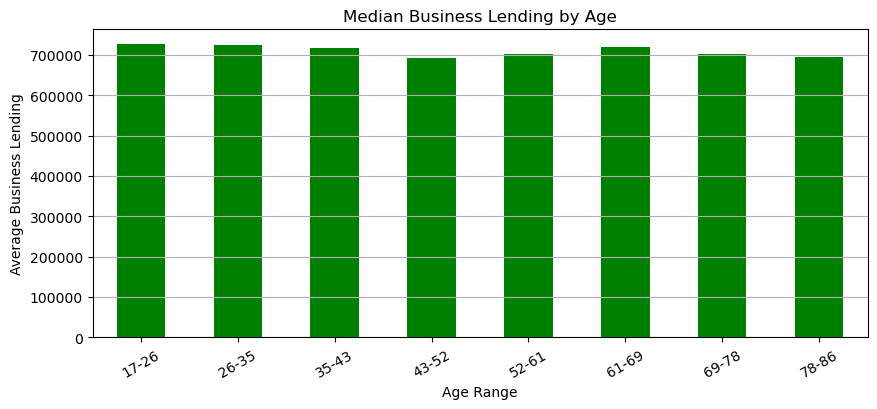

In [29]:
plt.figure(figsize=(10,4))
business_lending_by_age.plot(kind='bar', color='green')
plt.title('Median Business Lending by Age')
plt.xlabel('Age Range')
plt.ylabel('Average Business Lending')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.show()

The chart "Median Business Lending by Age" indicates that, despite the different age groups, the median business loans 
received are relatively consistent across all categories. This suggests that age may not significantly impact access to 
business lending. The uniform distribution of lending amounts implies that lenders are providing equal opportunities to 
entrepreneurs, regardless of their age. Additionally, this could reflect a broader trend of inclusivity in the lending market. 


In [30]:
income_range_by_age_range = df.groupby('age range band')['Estimated Income'].agg(lambda x: x.max() - x.min())
income_range_by_age_range

age range band
17-26    486822.69
26-35    483617.94
35-43    500588.88
43-52    494728.86
52-61    503101.50
61-69    462874.30
69-78    497853.82
78-86    502076.37
Name: Estimated Income, dtype: float64

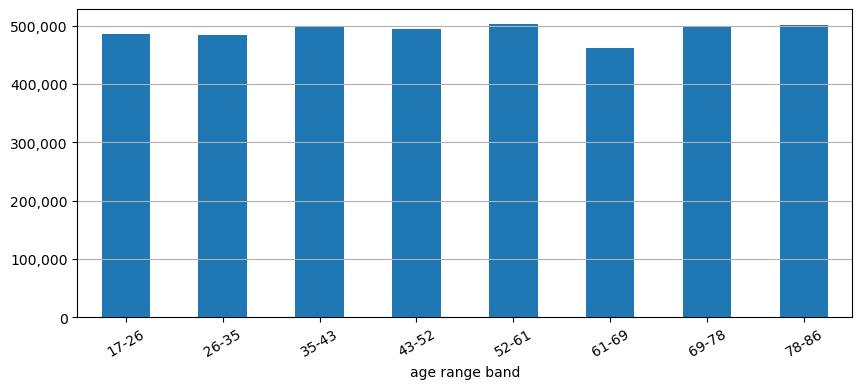

In [31]:
plt.figure(figsize =(10,4))
income_range_by_age_range.plot(kind='bar')
plt.xticks(rotation=30)
# Use FuncFormatter to display y-axis in standard format
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')  # Format with commas
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(axis='y')
plt.show()

The plot shows that income levels are fairly similar across different age groups, indicating that age doesn't have a big 
impact on income in this case. The bars are about the same height, which suggests that people of various ages earn similar 
amounts.

In [32]:
print(df.head())

  ï»¿Client ID            Name  Age Location ID Joined Bank  \
0     IND81288   Raymond Mills   24       34324  06-05-2019   
1     IND52609  Angela Roberts   22       30762  09-07-2005   
2     IND61397    Carol Duncan   74       26887  28-04-2021   
3     IND19395   Jeremy Fowler   52        3028  14-07-2002   
4     IND66158   Tammy Kennedy   78       24930  06-11-2014   

       Banking Contact Nationality                   Occupation Fee Structure  \
0       Anthony Torres    American         Safety Technician IV          High   
1  Nicholas Cunningham    European               Health Coach I          High   
2     Nicholas Simmons    European                  Developer I          High   
3      Roger Alexander       Asian  Administrative Assistant II           Low   
4        Joshua Little    European              Health Coach II           Mid   

  Loyalty Classification  ...  Properties Owned  Risk Weighting  BRId  \
0                   Jade  ...                 1              

In [33]:
unique_values =df['Banking Contact'].nunique()
unique_values

49

In [34]:
df['Banking Contact'].count()

3000

In [35]:
df.groupby('Banking Contact').size()

Banking Contact
Adam Hernandez         64
Anthony Berry          66
Anthony Simpson        59
Anthony Torres         72
Benjamin Kim           72
Bobby Burton           43
Bruce Butler           57
Bruce Porter           64
Carl Nguyen            49
Chris Armstrong        67
Dennis Morris          64
Dennis Ruiz            71
Donald Reynolds        51
Douglas Tucker         65
Ernest Rivera          77
Frank Brown            72
George Lewis           54
Gregory Simmons        53
James Castillo         65
Jason Duncan           55
Jeremy Vasquez         62
Jerry Green            63
Jesse Evans            67
Joe Hanson             57
Joe Price              68
Jonathan Hawkins       61
Joshua Bennett         65
Joshua Little          60
Joshua Ryan            59
Keith Griffin          53
Mark Montgomery        60
Nicholas Cunningham    67
Nicholas Simmons       63
Patrick Graham         69
Paul Holmes            63
Paul Larson            60
Phillip Peters         55
Raymond Alexander     

In [36]:
df.columns.to_list()

['ï»¿Client ID',
 'Name',
 'Age',
 'Location ID',
 'Joined Bank',
 'Banking Contact',
 'Nationality',
 'Occupation',
 'Fee Structure',
 'Loyalty Classification',
 'Estimated Income',
 'Superannuation Savings',
 'Amount of Credit Cards',
 'Credit Card Balance',
 'Bank Loans',
 'Bank Deposits',
 'Checking Accounts',
 'Saving Accounts',
 'Foreign Currency Account',
 'Business Lending',
 'Properties Owned',
 'Risk Weighting',
 'BRId',
 'GenderId',
 'IAId',
 'Gender',
 'Banking Relationship',
 'Investment Advisor',
 'Income Band',
 'age range band']

# Analyzing Categorical Data

In [37]:
all_cat_cols = df[['Amount of Credit Cards', 'Banking Contact', 'Nationality','Properties Owned','Fee Structure',
                   'Loyalty Classification','Risk Weighting', 'Banking Relationship','Gender','Investment Advisor','Income Band','age range band']].columns
for val in all_cat_cols:
    print(f"Value Counts for '{val}':")
    display(df[val].value_counts())

Value Counts for 'Amount of Credit Cards':


1    1922
2     765
3     313
Name: Amount of Credit Cards, dtype: int64

Value Counts for 'Banking Contact':


Ernest Rivera          77
Anthony Torres         72
Frank Brown            72
Benjamin Kim           72
Dennis Ruiz            71
Patrick Graham         69
Joe Price              68
Nicholas Cunningham    67
Jesse Evans            67
Victor Martinez        67
Chris Armstrong        67
Anthony Berry          66
Shawn Cook             66
Joshua Bennett         65
Douglas Tucker         65
James Castillo         65
Bruce Porter           64
Dennis Morris          64
Adam Hernandez         64
Victor Ramos           63
Stephen Payne          63
Paul Holmes            63
Nicholas Simmons       63
Jerry Green            63
Shawn Long             62
Jeremy Vasquez         62
Raymond Alexander      62
Jonathan Hawkins       61
Paul Larson            60
Mark Montgomery        60
Joshua Little          60
Joshua Ryan            59
Roger Alexander        59
Anthony Simpson        59
Samuel Fowler          58
Joe Hanson             57
Shawn Wallace          57
Bruce Butler           57
Phillip Pete

Value Counts for 'Nationality':


European      1309
Asian          754
American       507
Australian     254
African        176
Name: Nationality, dtype: int64

Value Counts for 'Properties Owned':


2    777
1    776
3    742
0    705
Name: Properties Owned, dtype: int64

Value Counts for 'Fee Structure':


High    1476
Mid      962
Low      562
Name: Fee Structure, dtype: int64

Value Counts for 'Loyalty Classification':


Jade        1331
Silver       767
Gold         585
Platinum     317
Name: Loyalty Classification, dtype: int64

Value Counts for 'Risk Weighting':


2    1222
1     836
3     460
4     322
5     160
Name: Risk Weighting, dtype: int64

Value Counts for 'Banking Relationship':


Private Bank     1352
Retail            660
Institutional     495
Commercial        493
Name: Banking Relationship, dtype: int64

Value Counts for 'Gender':


Female    1512
Male      1488
Name: Gender, dtype: int64

Value Counts for 'Investment Advisor':


Victor Dean          177
Ernest Knight        177
Joe Carroll          177
Eric Shaw            177
Jeremy Porter        177
Daniel Carroll       176
Lawrence Sanchez     176
Nicholas Ward        176
Peter Castillo       176
Carl Anderson        176
Steve Sanchez        176
Victor Gutierrez     176
Victor Rogers         89
Eugene Cunningham     89
Kevin Kim             89
Fred Bryant           88
Gregory Boyd          88
Jack Phillips         88
Sean Vasquez          88
Juan Ramirez          88
Ryan Taylor           88
Nicholas Morrison     88
Name: Investment Advisor, dtype: int64

Value Counts for 'Income Band':


Low          1583
Medium        961
High          441
Very High      15
Name: Income Band, dtype: int64

Value Counts for 'age range band':


43-52    419
26-35    415
69-78    403
52-61    372
17-26    366
78-86    353
35-43    344
61-69    328
Name: age range band, dtype: int64

# Univarite Analysis

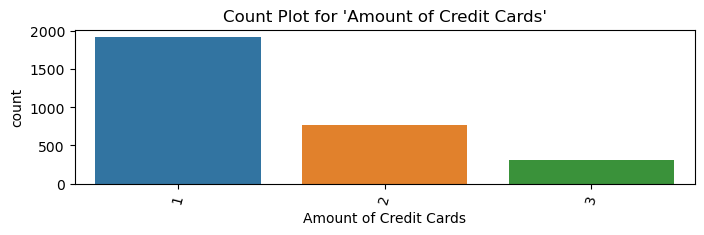

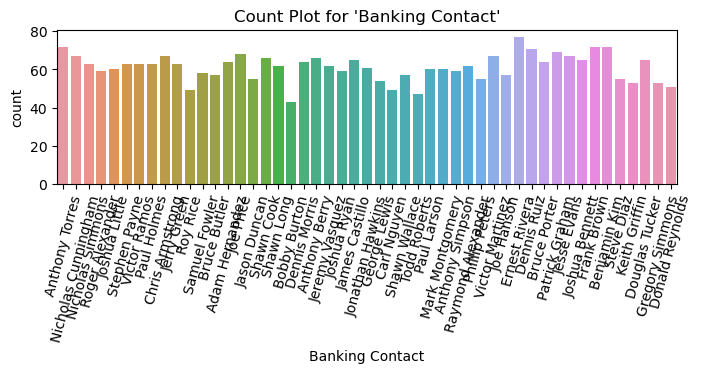

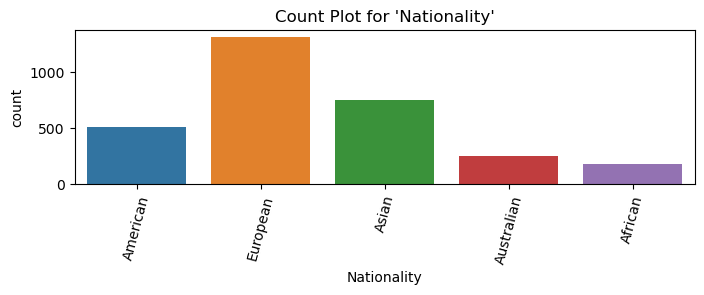

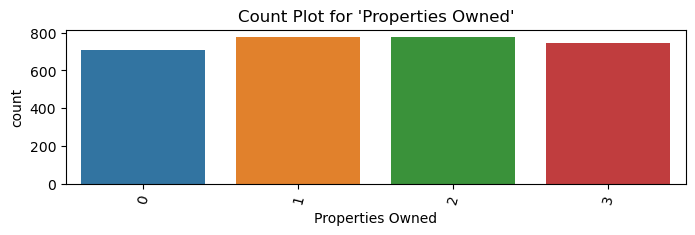

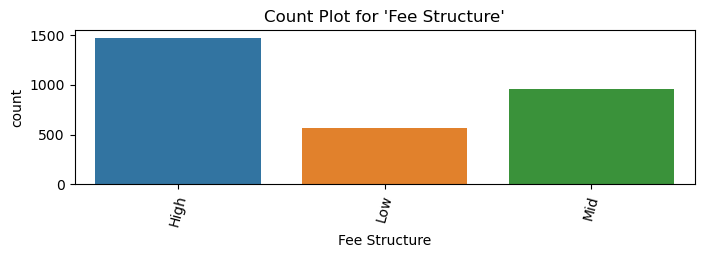

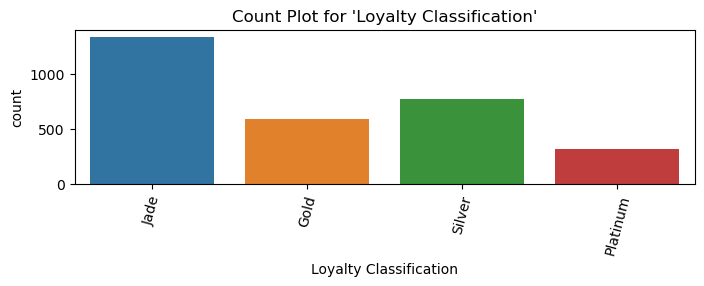

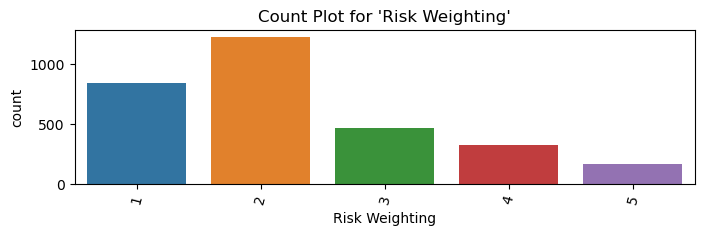

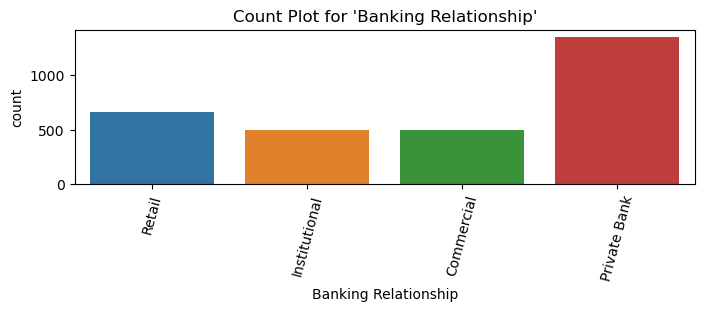

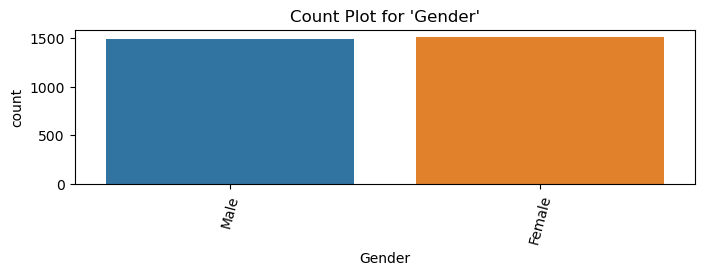

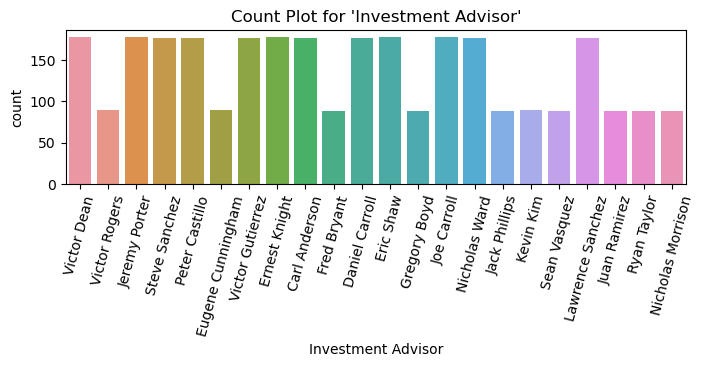

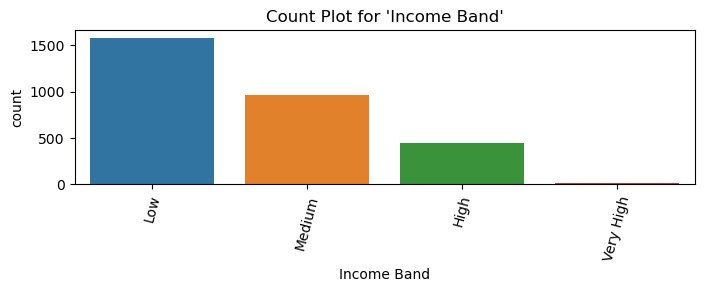

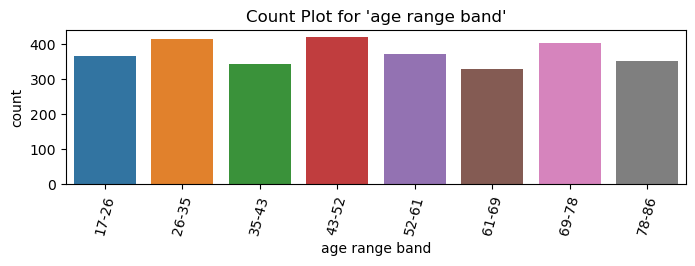

In [38]:
for i, cols in enumerate(all_cat_cols):
    plt.figure(i, figsize=(8,2))
    sns.countplot(data= df, x= cols)
    plt.title(f"Count Plot for '{cols}'")
    plt.xticks(rotation=75)
    plt.show()


The count plot shows that the "Low" income band has the highest count, indicating that most people fall into this category. The "Medium" income band is moderate, while the "High" and "Very High" bands are much lower, with "Very High" being minimal. This unequal distribution highlights that many individuals struggle with lower incomes, reflecting broader economic challenges.

# Bivariate Analysis

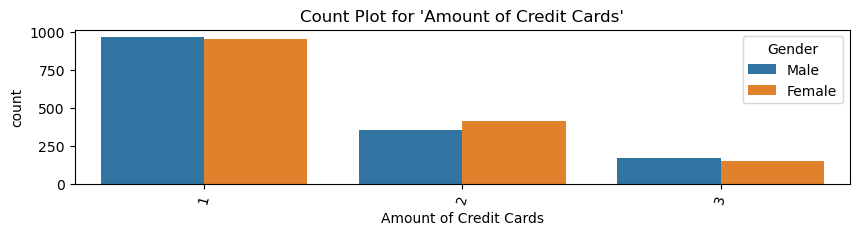

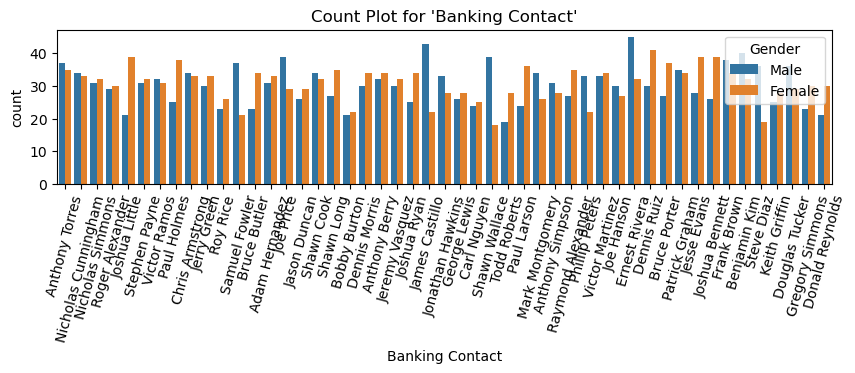

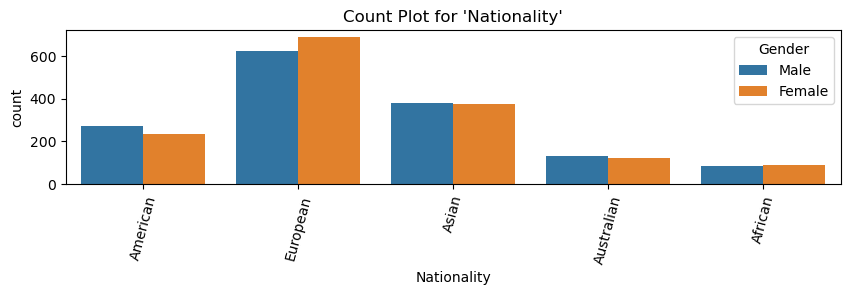

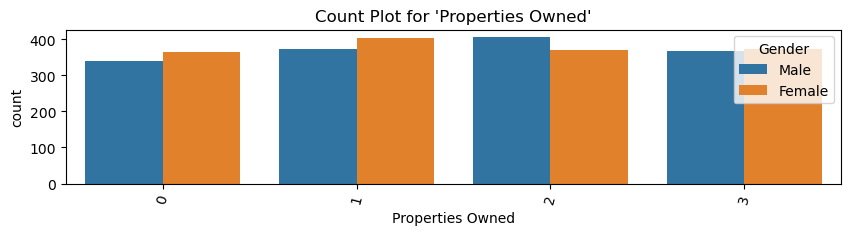

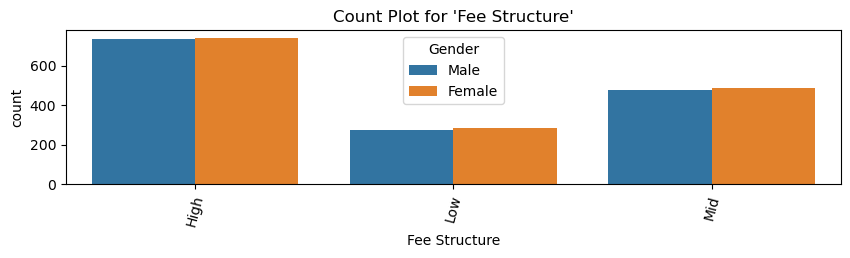

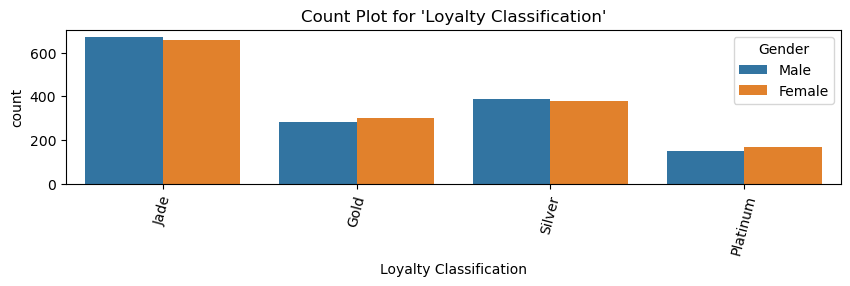

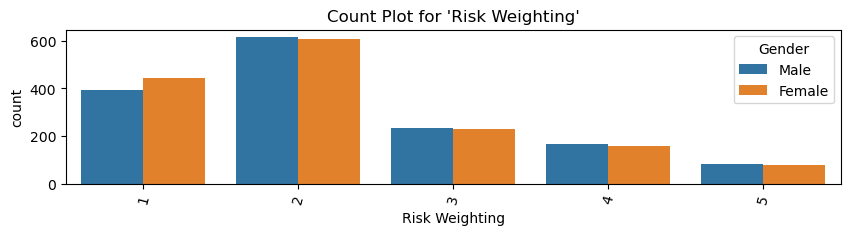

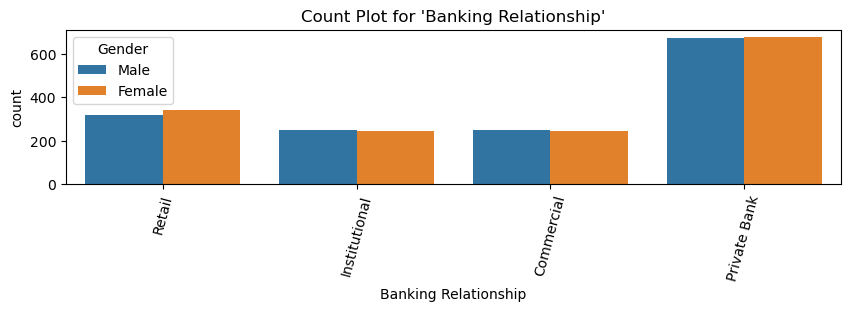

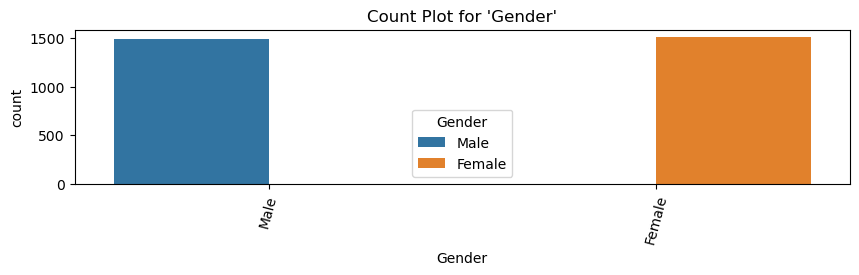

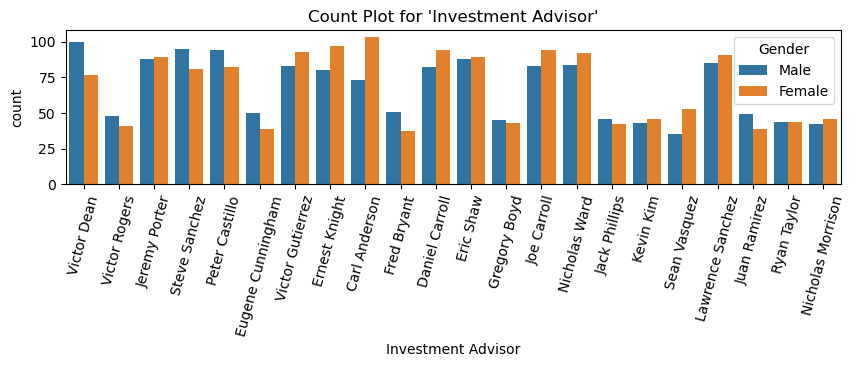

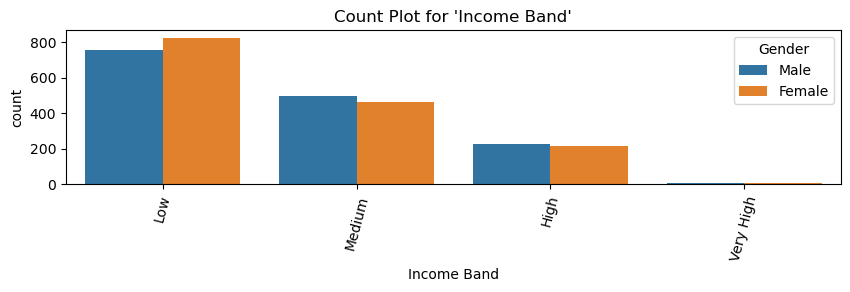

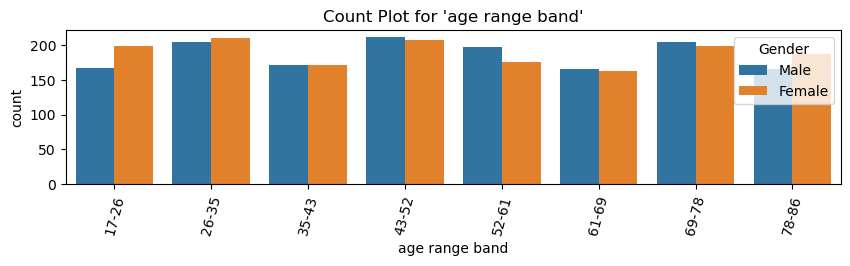

In [39]:
for i, cols in enumerate(all_cat_cols):
    plt.figure(i, figsize=(10,2))
    sns.countplot(data= df, x= cols, hue='Gender')
    plt.title(f"Count Plot for '{cols}'")
    plt.xticks(rotation=75)
    plt.show()

### Banking Relationship
The count plot for "Banking Relationship" by gender reveals that the "Private Bank" category has the highest count, indicating 
strong engagement among individuals with private banking services. The "Retail" category follows closely, while the 
"Institutional" and "Commercial" categories show lower counts, suggesting less representation in these banking relationships. 
Notably, male and female counts are almost equal across all categories, indicating a balanced gender representation in banking 
services. This distribution highlights preferences for different types of banking relationships and suggests that both genders 
are equally engaged.

### Nationality
The count plot for "Nationality" by gender reveals that the "European" category has the highest count, indicating a significant presence of individuals identifying as European. The "American" and "Asian" nationalities also show notable counts, while the "Australian" and "African" categories have the lowest representation. 

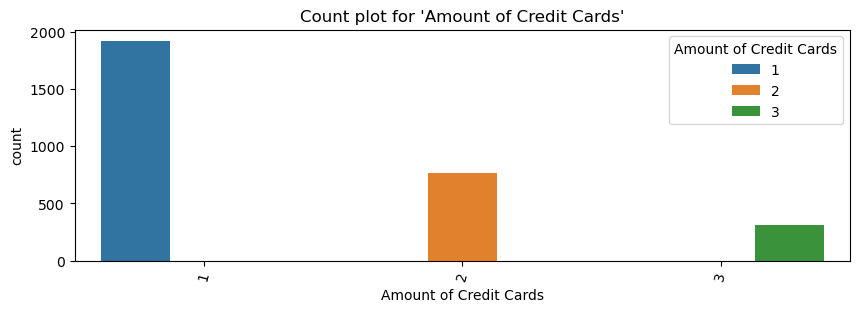

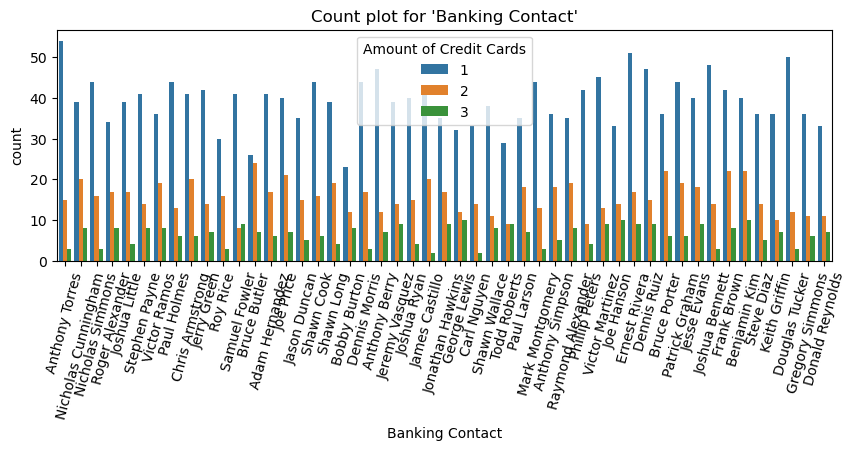

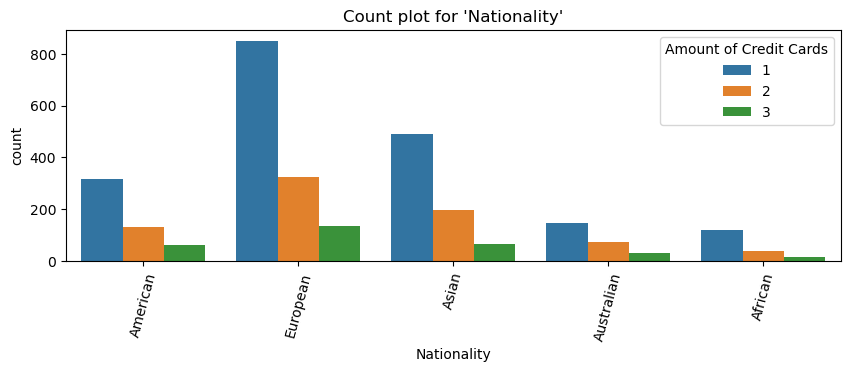

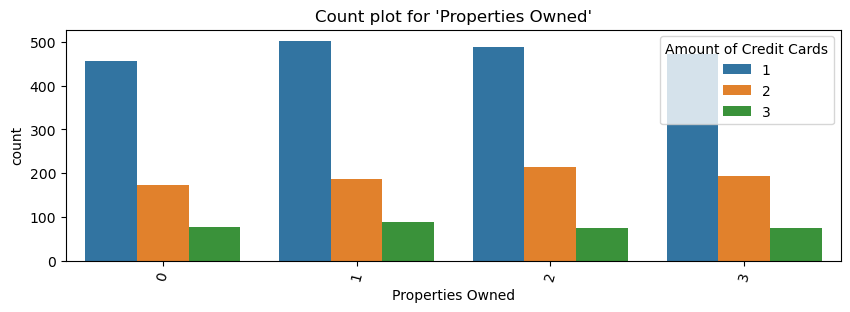

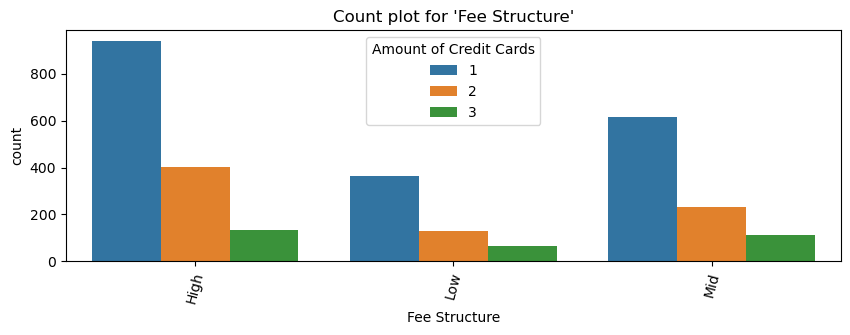

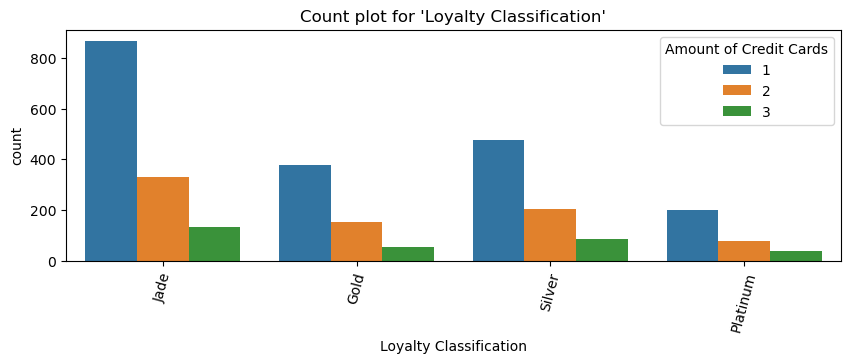

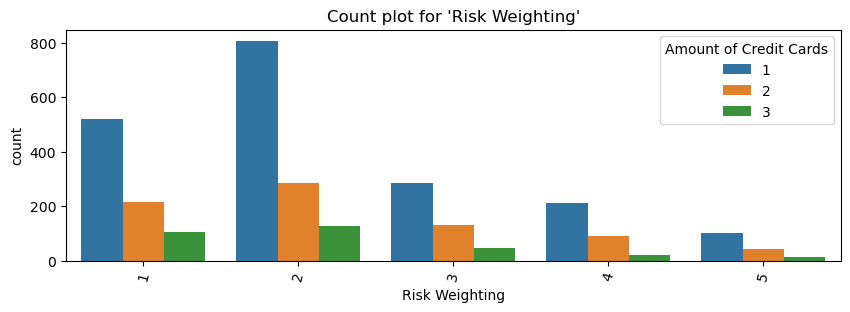

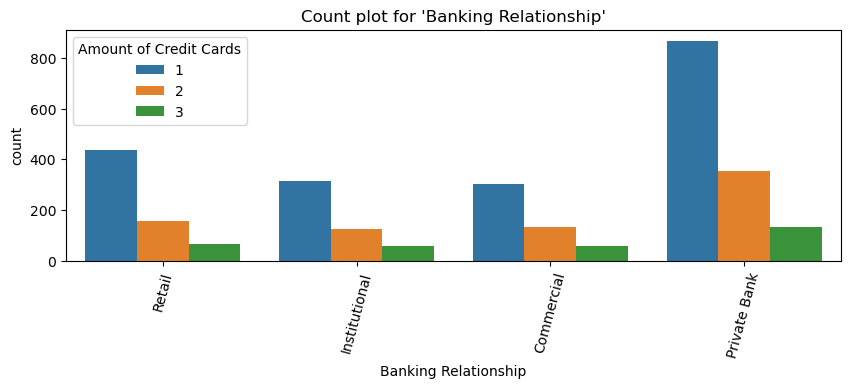

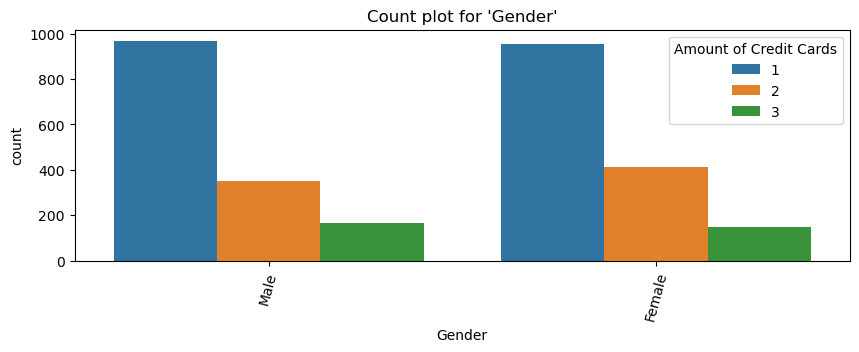

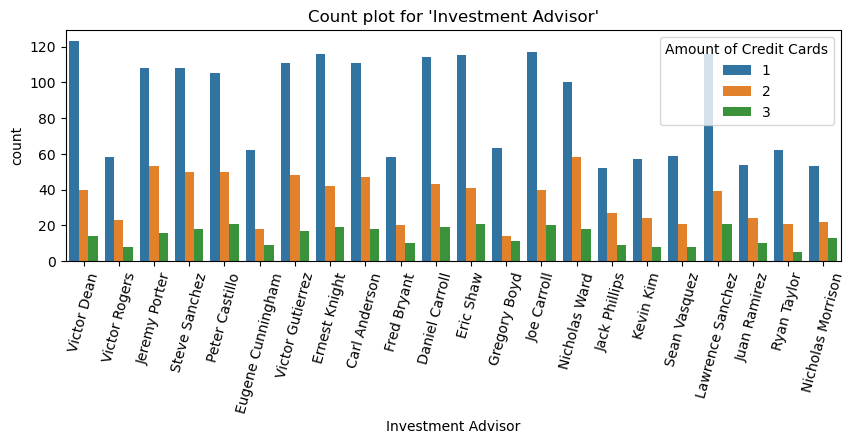

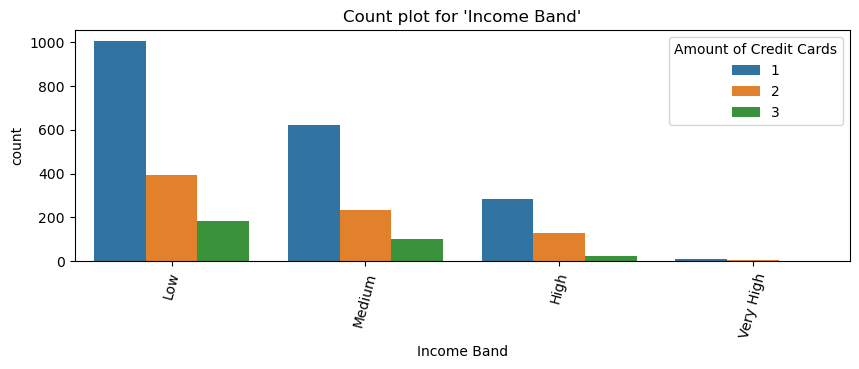

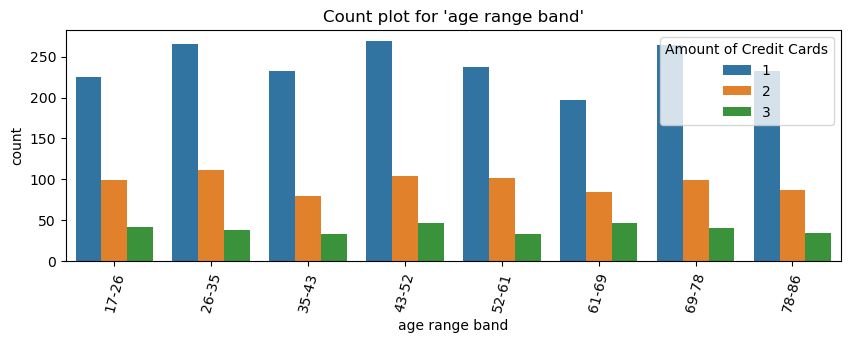

In [40]:
for i, cols in enumerate(all_cat_cols):
    plt.figure(i, figsize =(10,3))
    sns.countplot(data= df,x=cols, hue='Amount of Credit Cards')
    plt.title(f"Count plot for '{cols}'")
    plt.xticks(rotation = 75)
    plt.show()

### Nationality
It reveals that individuals identifying as "European" have the highest number of credit cards, followed by those identifying 
as "American." In contrast, the counts for "Asian," "Australian," and "African" nationalities are significantly lower, 
indicating that credit card ownership is more prevalent among Europeans and Americans.

### Property owned
It illustrates that most individuals own either one or two properties, with a notable decrease in the count for those owning 
three properties. This suggests that fewer property holdings are associated with credit card ownership in this dataset.

### Fee Structure
It highlights that individuals with a "High" fee structure tend to have the most credit cards, whereas those 
with "Low" and "Mid" fee structures show lower counts. This may indicate that higher fee structures are linked to greater 
credit card usage.

### Gender
It shows a significant gender disparity, with males holding considerably more credit cards than females across all categories.

In conclusion, these plots collectively reveal relationships between various factors and credit card ownership. Individuals 
from European and American nationalities tend to hold more credit cards, as do those with higher fee structures. Additionally, 
males dominate credit card ownership, while property ownership appears to correlate with fewer credit cards, suggesting a 
complex interplay between these factors in financial behavior.


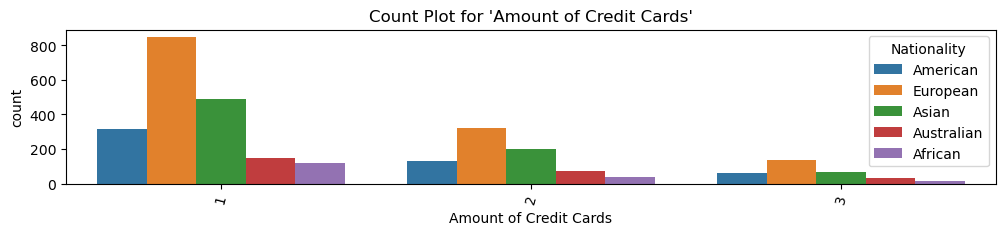

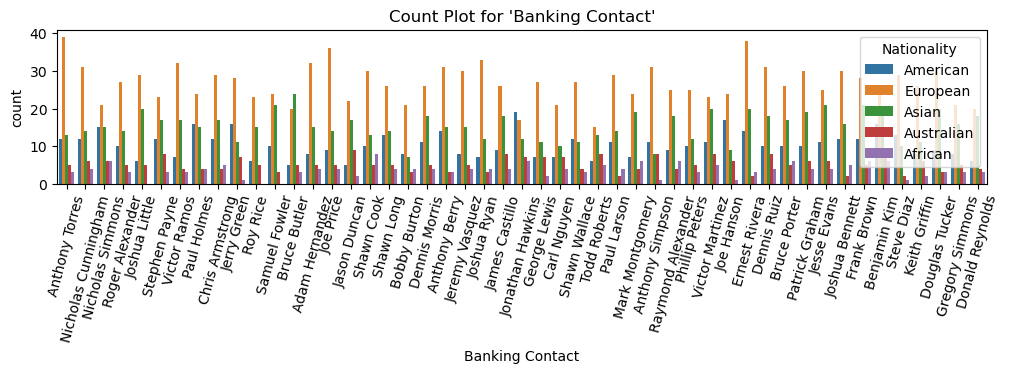

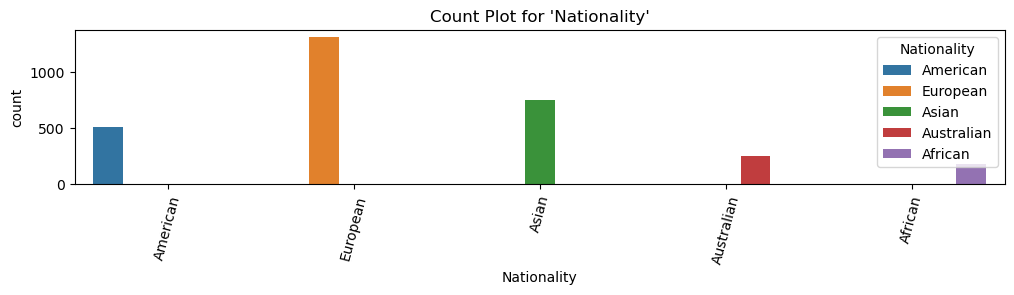

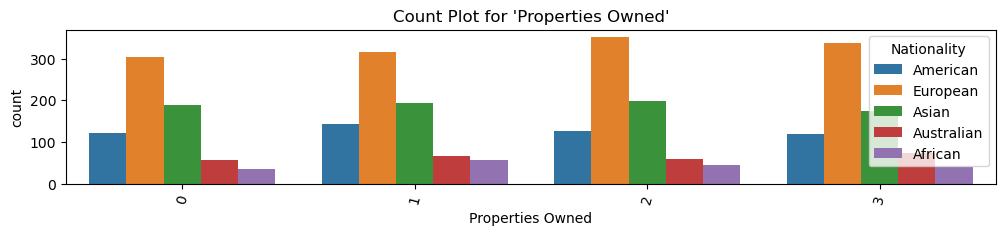

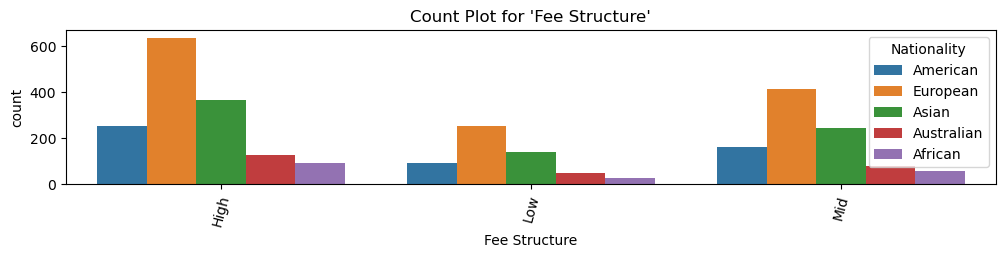

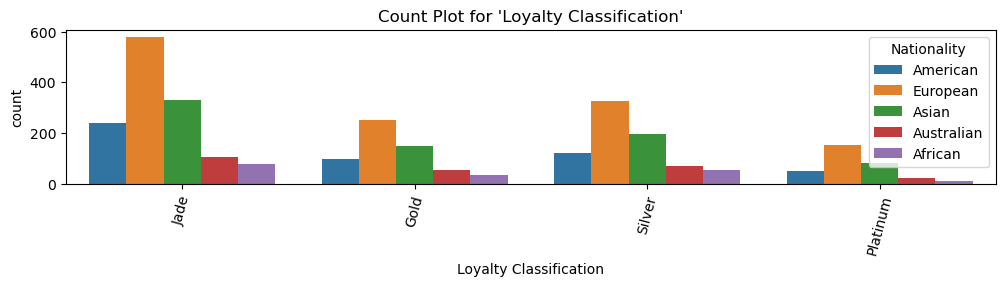

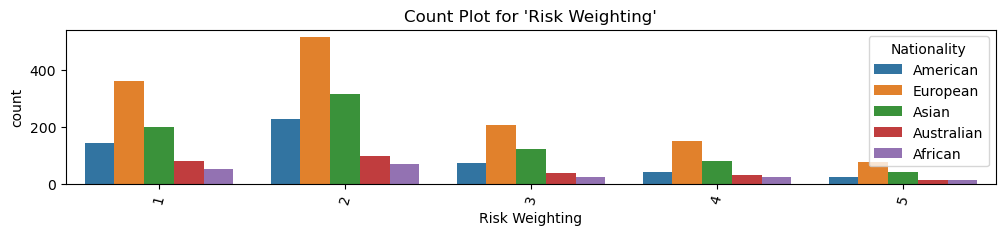

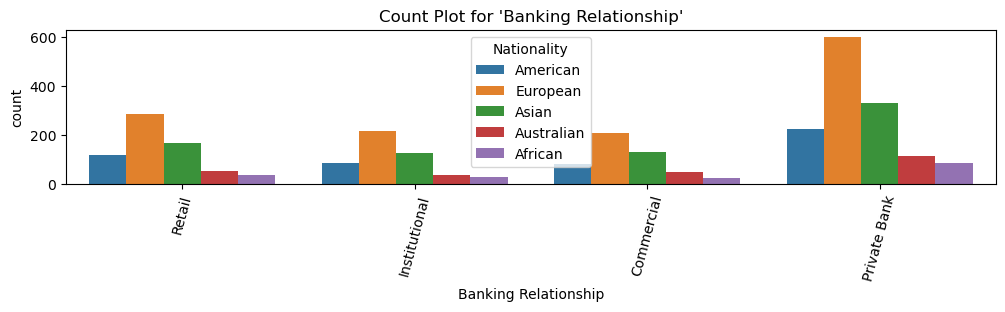

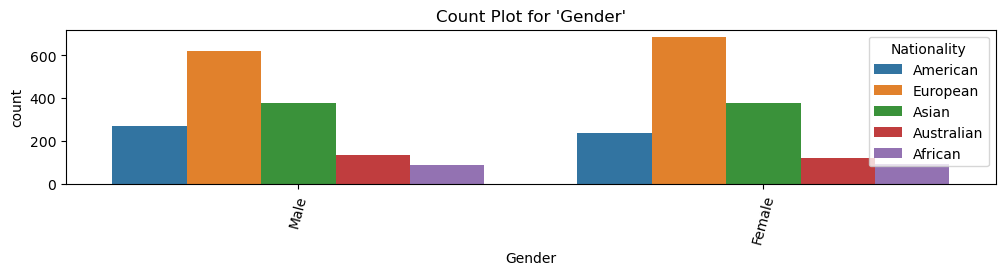

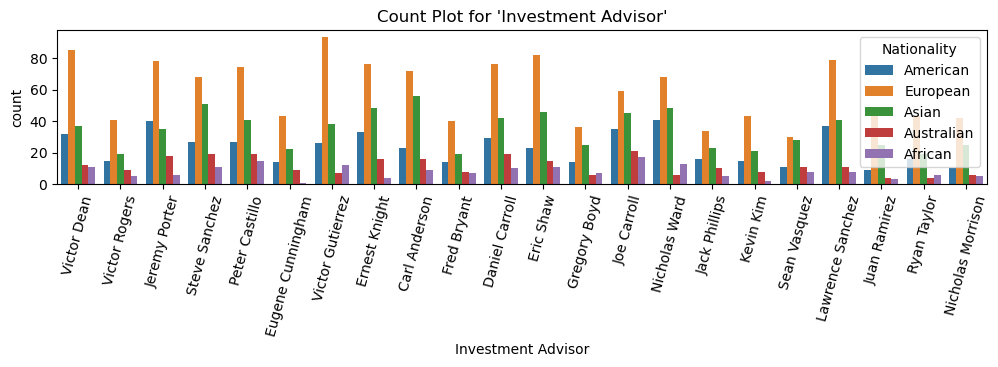

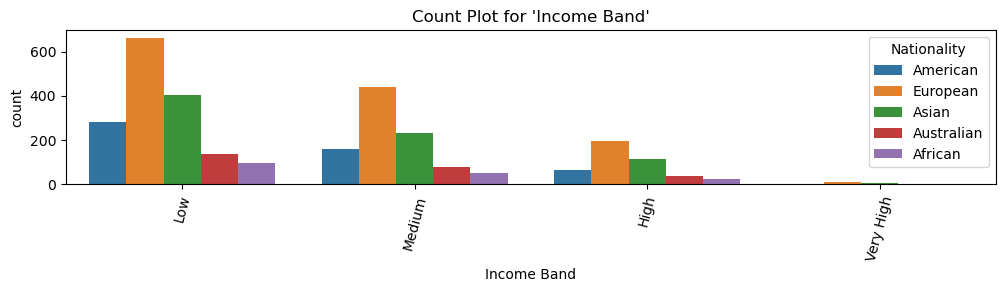

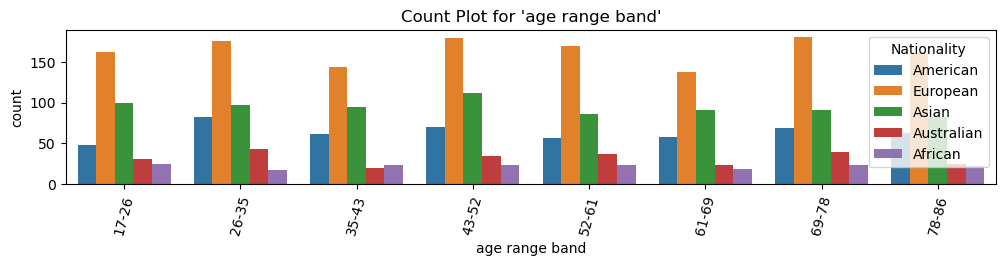

In [41]:
for i, cols in enumerate(all_cat_cols):
    plt.figure(i, figsize=(12,2))
    sns.countplot(data= df, x= cols, hue='Nationality')
    plt.title(f"Count Plot for '{cols}'")
    plt.xticks(rotation=75)
    plt.show()

### amount of credit cards
The trend indicates a notable disparity in credit card ownership, with Europeans leading significantly. This may be attributed 
to the fact that Europeans also have the highest number of bank accounts. Having a bank account is often essential for
obtaining a credit card, as it establishes a financial relationship with the bank. This correlation suggests that countries
with more bank account holders are likely to see increased credit card ownership.


# Distribution of Counts for Categorical Variables

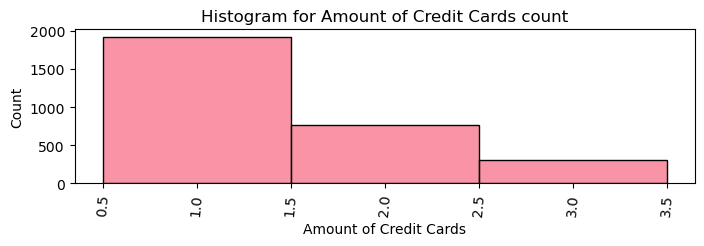

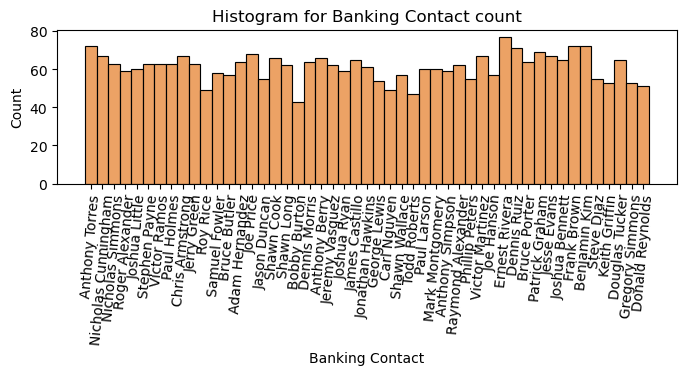

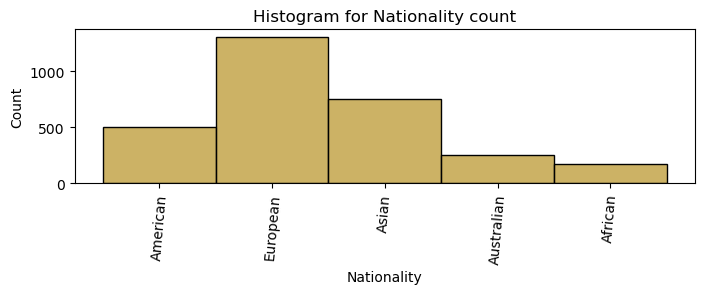

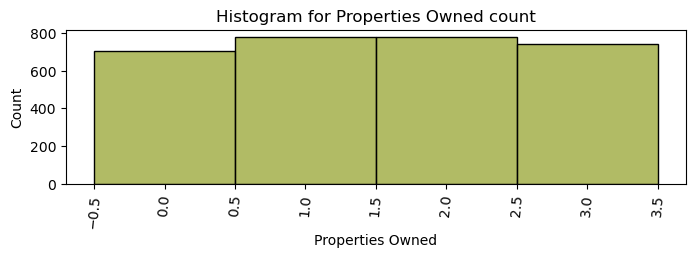

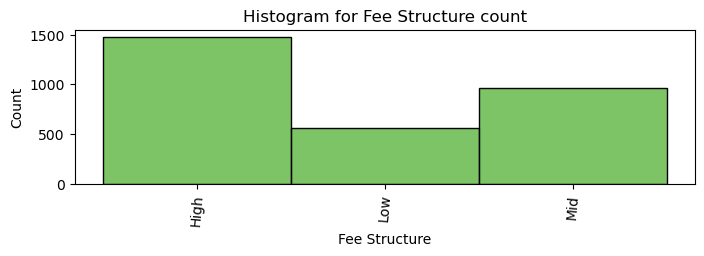

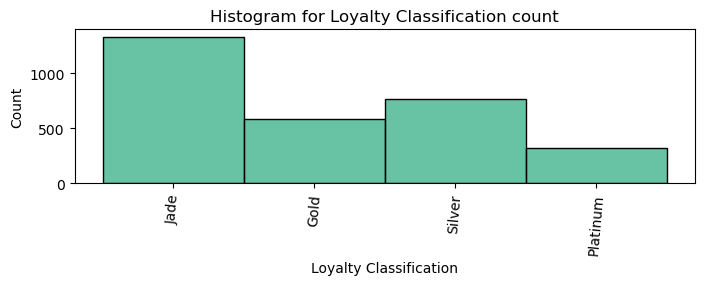

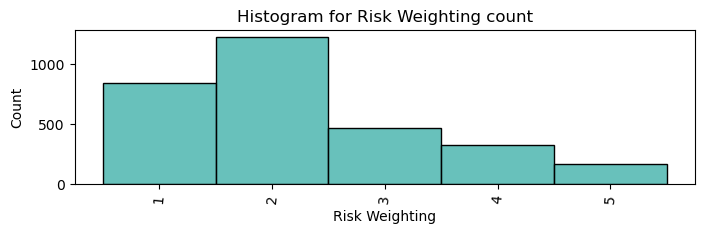

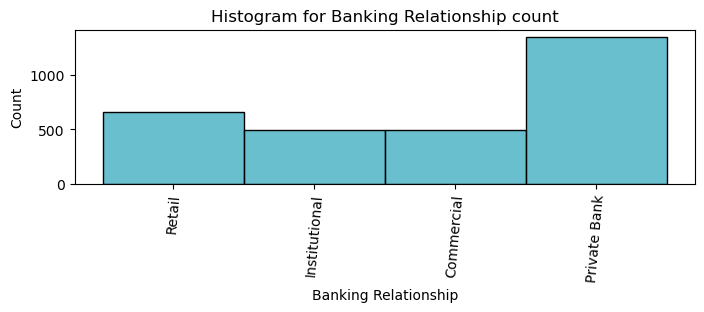

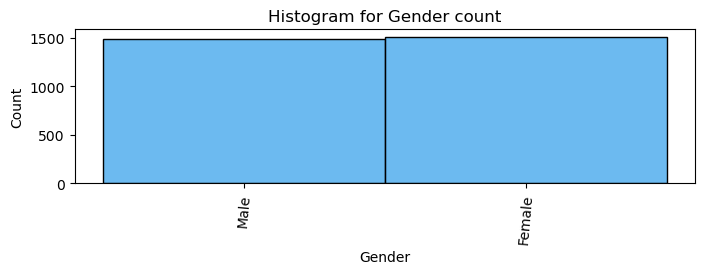

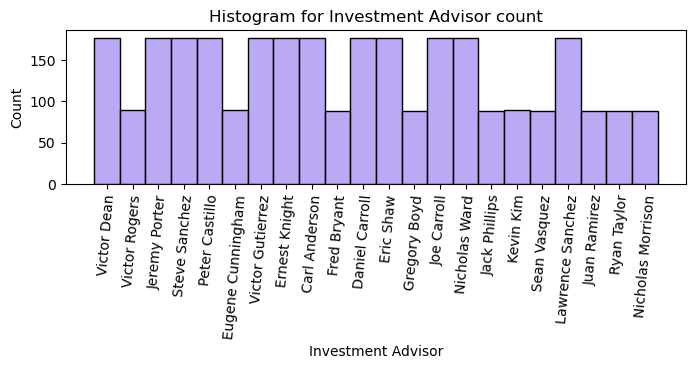

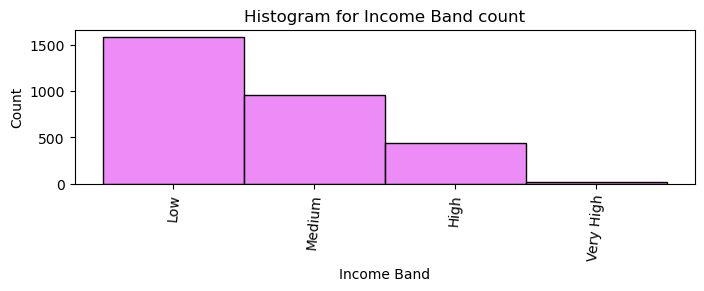

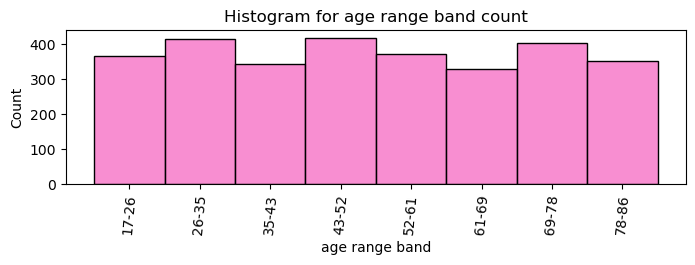

In [42]:
color_palette = sns.color_palette("husl", len(all_cat_cols)) # this generates the color palate
for i, col in enumerate(all_cat_cols):
    plt.figure(figsize=(8,2))
    sns.histplot(df[col], color=color_palette[i], discrete=True)
    plt.title(f'Histogram for {col} count')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation= 85)
    plt.show()
    

### Fee Structure Count
The High fee structure has the highest count of customers, indicating that a significant number of accounts are associated 
with higher fees. This may suggest that customers are willing to pay more for premium services or benefits.

### Banking Relationship count
The high count in the Private Bank category indicates that many customers prefer private banking services. This could suggest 
that customers are seeking personalized services or wealth management options.
The histogram shows that the Jade loyalty classification has the highest count of customers, indicating it is the most common 
tier. This suggests that many customers find it accessible and appealing, reflecting effective engagement strategies.

### loyalty classification count
This strong base in the Jade tier presents an opportunity to encourage customers to progress to higher tiers 
(Gold, Silver, Platinum) by enhancing incentives and rewards, ultimately fostering deeper loyalty and satisfaction.

### Income band count 
The Low income band has the highest count, indicating that a significant portion of customers falls into this category. 
This suggests that the customer base is largely composed of individuals with lower incomes.


# Analyzing Numerical Data

In [43]:
all_num_cols =['Saving Accounts', 'Foreign Currency Account', 'Business Lending', 'Credit Card Balance',
'Bank Loans','Bank Deposits', 'Checking Accounts', 'Estimated Income', 'Superannuation Savings']

# Univarite Analysis

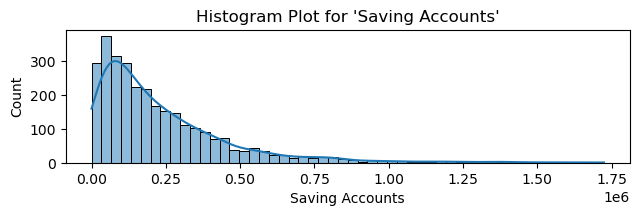

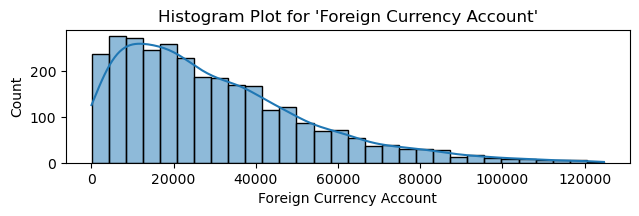

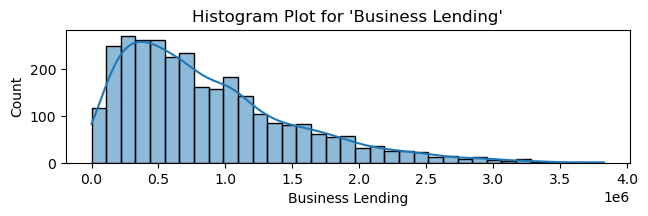

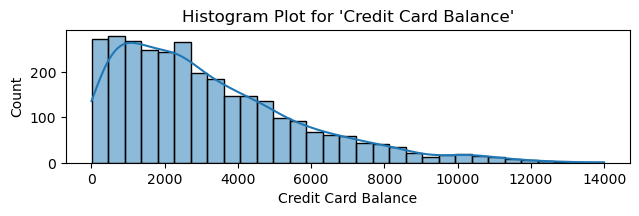

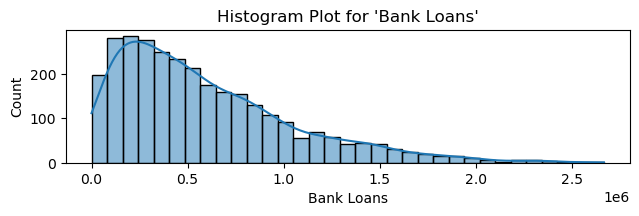

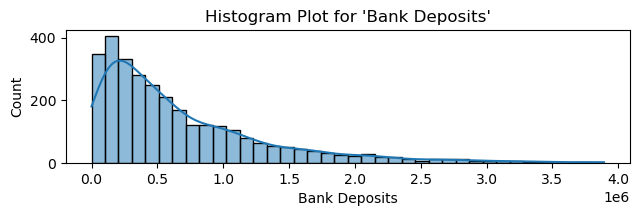

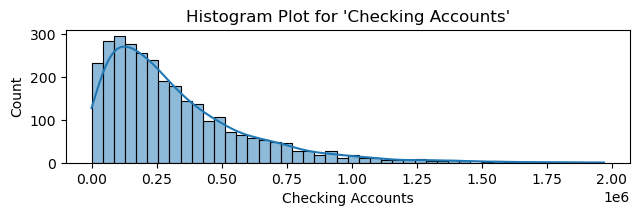

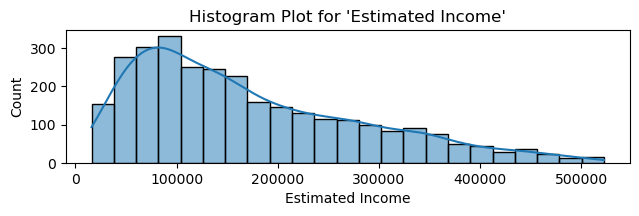

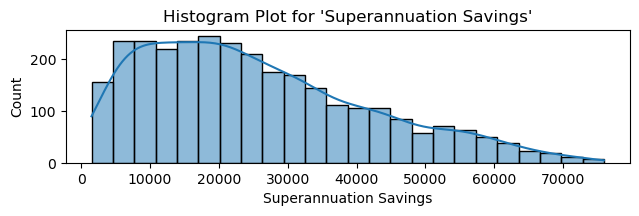

In [44]:
num_cols = len(all_num_cols)
num_rows = int(np.ceil(num_cols / 2)) 


for i, cols in enumerate(all_num_cols):
    plt.figure(figsize =(16,10))
    plt.subplot(num_rows,2,i+1)
    sns.histplot(df[cols], kde = True)
    plt.title(f"Histogram Plot for '{cols}'")
    plt.show()

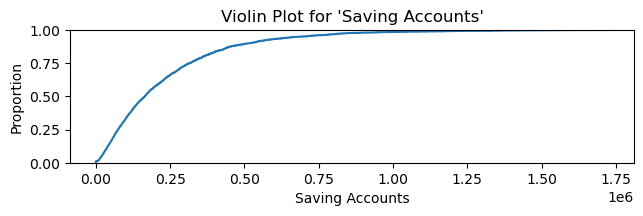

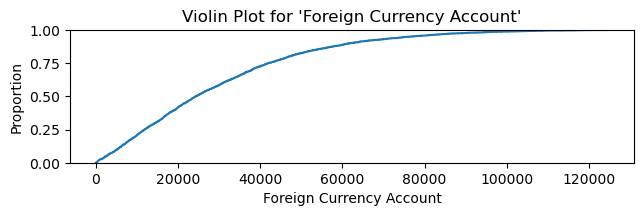

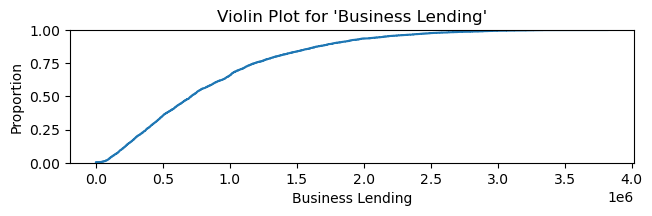

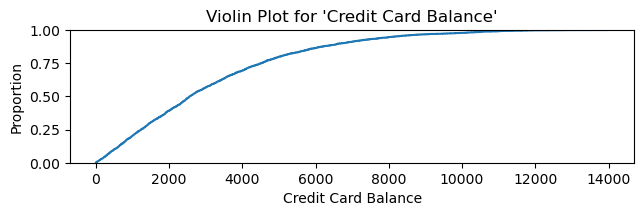

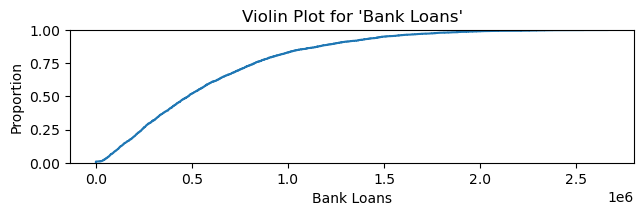

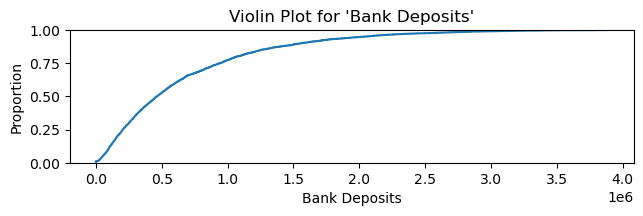

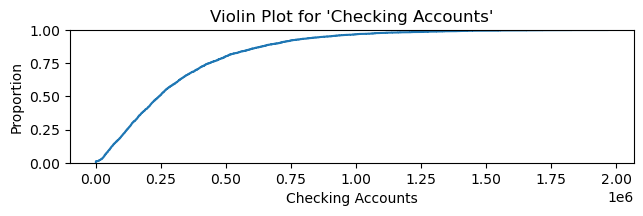

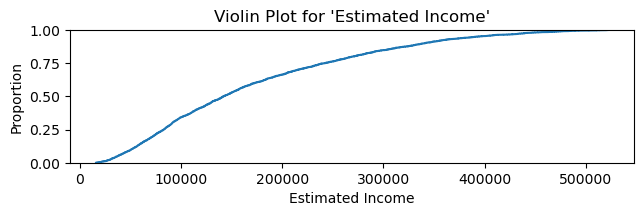

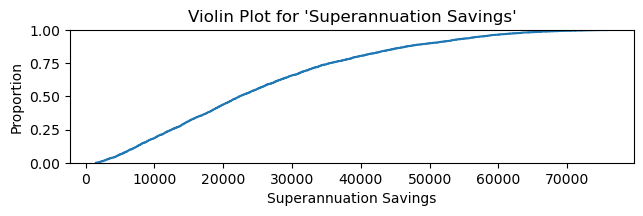

In [45]:
num_cols = len(all_num_cols)
num_rows = int(np.ceil(num_cols / 2)) 

for i, cols in enumerate(all_num_cols):
    plt.figure(figsize =(16,10))
    plt.subplot(num_rows,2,i+1)
    sns.ecdfplot(data=df[cols])
    plt.title(f"Violin Plot for '{cols}'")
    plt.show()

## Insights 
Majority Behavior: Most individuals or businesses maintain lower balances or accounts, suggesting that financial products are widely used by a large segment of the population, particularly those with modest incomes or savings.

High-Value Accounts: The presence of a long tail on the right side indicates a small number of accounts with significantly higher balances. This highlights the importance of high-net-worth individuals or businesses that may represent valuable customer segments for financial institutions.

Targeted Strategies: Understanding this distribution allows financial institutions to tailor their services effectively. For instance, marketing strategies can focus on enhancing products for the majority while also catering to the specific needs of high-value customers.

Risk Management: The skewness suggests that while most accounts are relatively low-risk, the few high-value accounts may require closer scrutiny to manage potential risks effectively.

Financial Planning: Insights from these distributions can inform financial planning and product development, ensuring that offerings align with the needs of diverse customer segments.

Overall, recognizing the right skewness in these financial variables not only aids in understanding customer behavior but also provides actionable information for better service delivery, risk assessment, and strategic planning in the financial sector.

# HeatMap

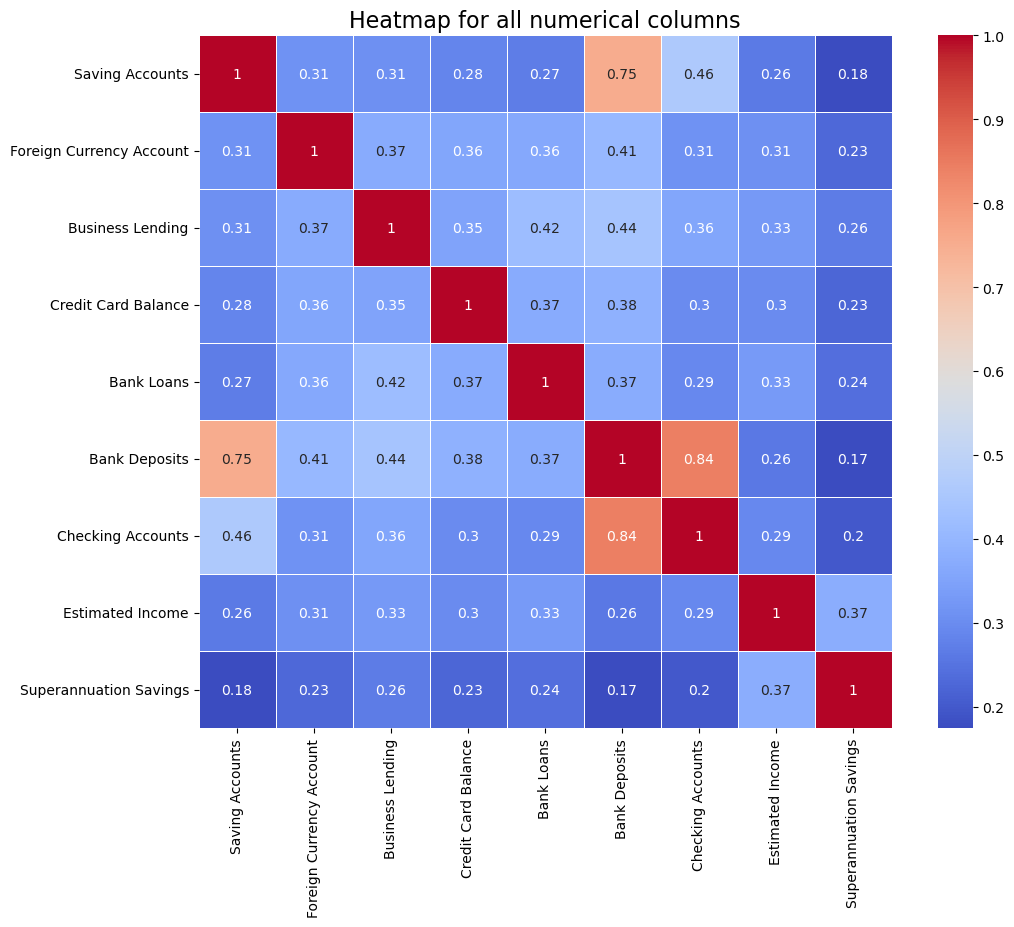

In [46]:
heatmap_correlation_matrix = df[all_num_cols].corr()
plt.figure(figsize=(12,9))
sns.heatmap(heatmap_correlation_matrix, linewidths=0.5, cmap="coolwarm", yticklabels=True, annot= True,square=True)
plt.title("Heatmap for all numerical columns", fontsize=16)
plt.show()

## Insights of EDA

### 1

Bank Deposit have strong co-relation with saving and checking accounts

Customer Behavior: Customers who maintain a checking account may also have a savings account, suggesting a tendency to manage their finances across multiple account types.

Financial Stability: A strong correlation might imply that individuals with higher bank deposits tend to have both checking and savings accounts, possibly indicating better financial health and savings habits.

Cross-Selling Opportunities: High correlation suggests potential for marketing related products. For instance, promoting savings account features to checking account holders could increase overall deposits.

Risk Assessment: If these accounts are correlated, banks might assess the risk of customers based on their overall banking behavior, which could influence lending decisions.

Product Design: Understanding this correlation can help banks design bundled products that cater to customers' needs, such as incentive programs for maintaining both account types.

Customer Segmentation: Banks can segment customers based on their account types and deposits, enabling targeted services and improving customer experience.

In summary, this high correlation can reflect customer preferences, financial habits, and opportunities for strategic business initiatives.


### 2  
The data shows a strong connection between having a bank account, owning credit cards, owning property, and dealing with fees. Europeans are the most successful in all these areas, which shows they are financially stable. This highlights the need for efforts to help other nationalities access banking and financial services, which could improve their financial security and participation in various services.

or 

Overall, the data illustrates a significant link between bank account ownership, credit card access, and property ownership, particularly among Europeans. This relationship underscores the need for initiatives aimed at increasing access to banking services and credit for other nationalities, which could lead to enhanced financial stability and asset accumulation.

choose one